# study of NIFTY data of 5 years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [123]:
bank_data=pd.read_csv(r"C:\Users\shafat\Desktop\python\NSEBANKfive.csv")

In [124]:
#overview of data
bank_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2/1/2016,15206.29981,15367.90039,13519.90039,13555.70020,13555.70020,287400.0,2
1,3/1/2016,NaN,NaN,NaN,NaN,NaN,NaN,3
2,4/1/2016,16236.90039,16278.50000,16046.50000,16190.59961,16190.59961,70300.0,4
3,5/1/2016,16600.65039,17025.84961,16599.05078,16997.44922,16997.44922,83900.0,5
4,6/1/2016,17710.44922,18051.50000,17636.90039,17828.59961,17828.59961,170300.0,6


In [125]:

# converting the datemonth stamp t month year(not required)
bank_data.dtypes
from datetime import datetime
bank_data['Date']=pd.to_datetime(bank_data['Date'].astype(str), format='%m/%d/%Y')
bank_data['mnth_yr'] = bank_data['Date'].apply(lambda x: x.strftime('%B-%Y')) 
bank_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month,mnth_yr
0,2016-02-01,15206.29981,15367.90039,13519.90039,13555.70020,13555.70020,287400.0,2,February-2016
1,2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN,3,March-2016
2,2016-04-01,16236.90039,16278.50000,16046.50000,16190.59961,16190.59961,70300.0,4,April-2016
3,2016-05-01,16600.65039,17025.84961,16599.05078,16997.44922,16997.44922,83900.0,5,May-2016
4,2016-06-01,17710.44922,18051.50000,17636.90039,17828.59961,17828.59961,170300.0,6,June-2016


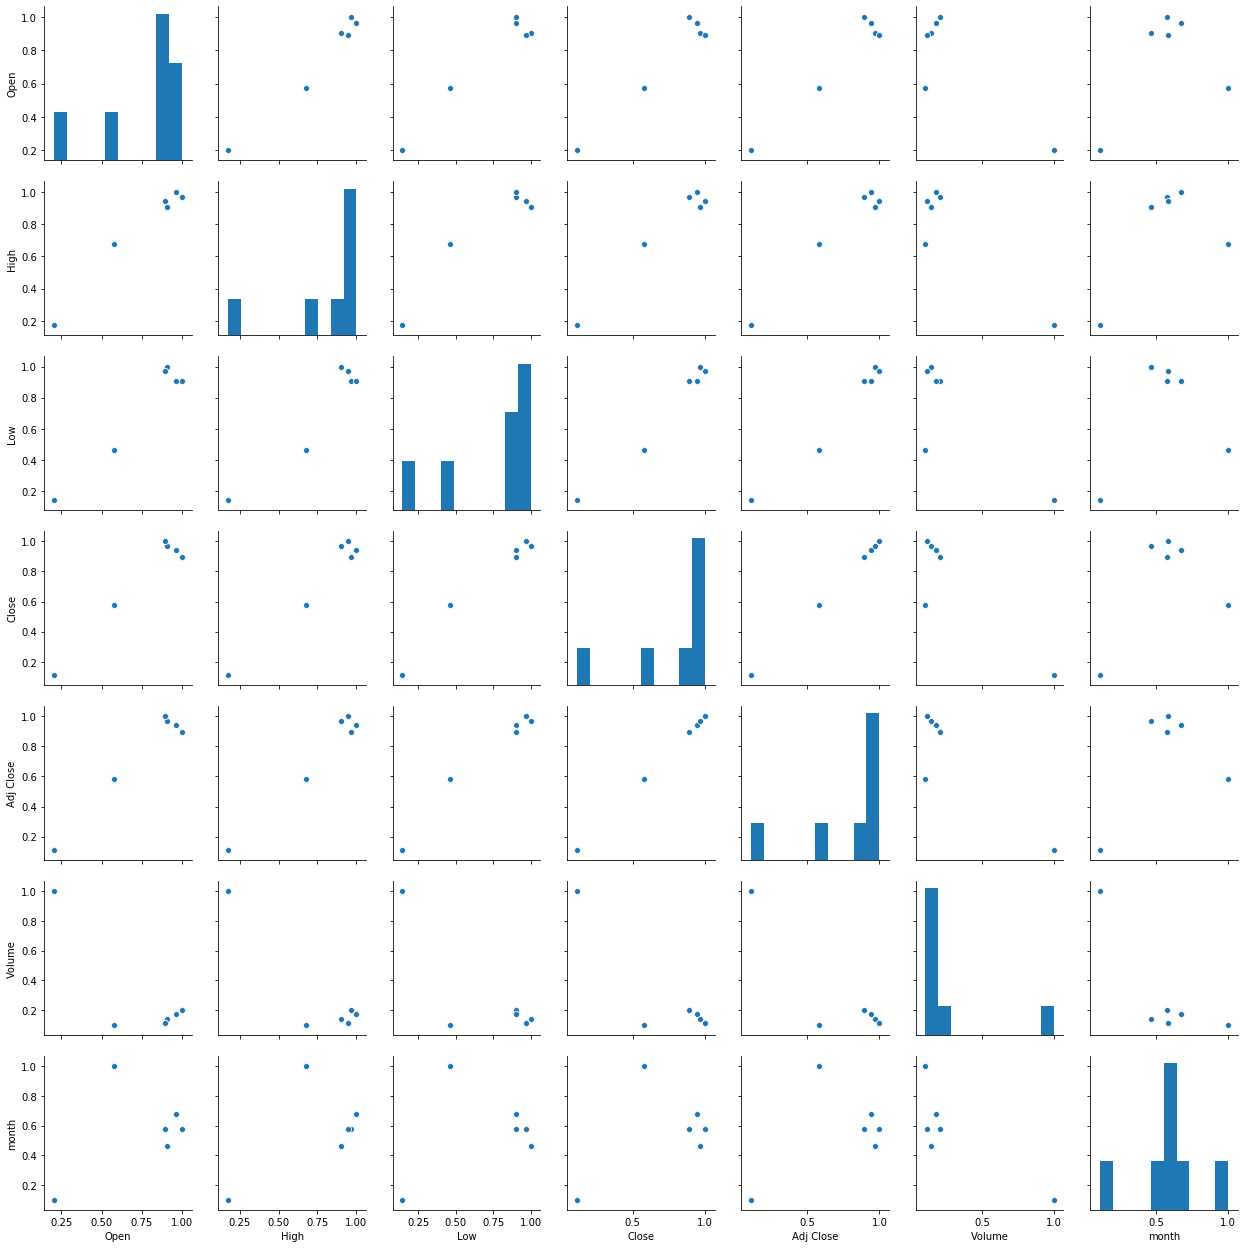

In [127]:
#check relation between variables
sb.pairplot(bank_data.corr())

In [128]:
#check the data
bank_data.corr()

,Open,High,Low,Close,Adj Close,Volume,month
Open,1.000000,0.965280,0.904435,0.892469,0.892469,0.202303,0.575560
High,0.965280,1.000000,0.903916,0.943114,0.943114,0.175576,0.674755
Low,0.904435,0.903916,1.000000,0.968330,0.968330,0.143118,0.464126
Close,0.892469,0.943114,0.968330,1.000000,1.000000,0.112522,0.579957
Adj Close,0.892469,0.943114,0.968330,1.000000,1.000000,0.112522,0.579957
Volume,0.202303,0.175576,0.143118,0.112522,0.112522,1.000000,0.102999
month,0.575560,0.674755,0.464126,0.579957,0.579957,0.102999,1.000000


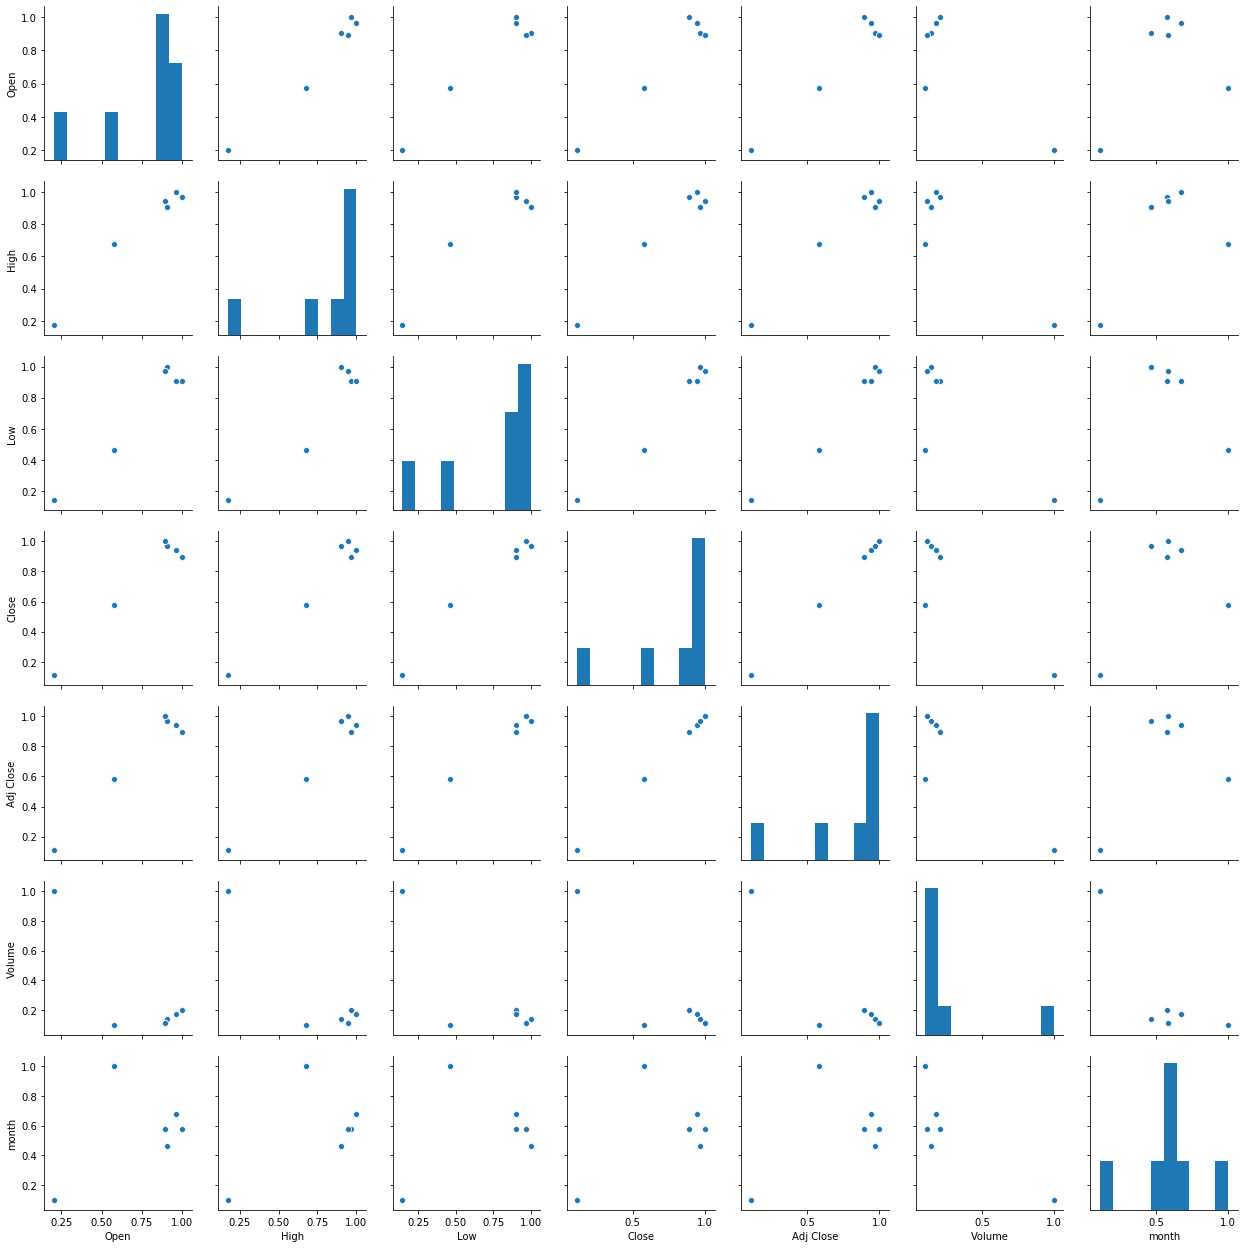

In [95]:
sb.pairplot(bank_data.corr())

In [129]:
#missing value treatments

In [38]:
#missing value treatments

In [130]:
# Taking care of missing data, Imputer is a class from the sklearn library
# The missing data in above frame would be stored as  'nann'
#from sklearn.preprocessing import Imputer

# i will not use imputer rather delete the rows containing nan as replacing with mean can give error

In [131]:
bank = bank_data.dropna(axis = 0, how ='any')

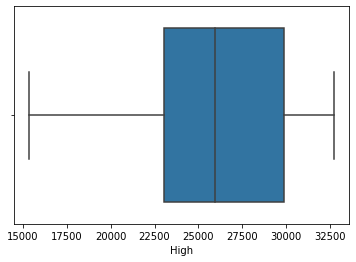

In [132]:
sb.boxplot(bank_data.High)

In [133]:
X=bank.iloc[:,7:8].values
Y=bank.iloc[:,1].values

In [135]:
#check the dimension
X.ndim

2

In [136]:
#check outliers

from scipy import stats
z = max(np.abs(stats.zscore(Y)))
print(z)


2.1687878585343396


In [138]:
#check dimension
Y.ndim

1

In [85]:
# i am not using label encoder here rather take month column as X

#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encoding the Independent Variable
#labelencoder_X = LabelEncoder()
#X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# Encoding the Independent Variable and creating dummy values


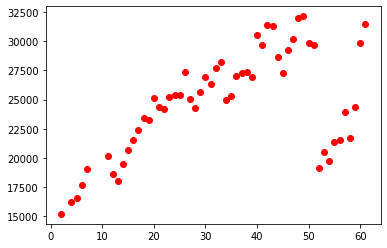

In [140]:
#check relationship between X & Y

plt.scatter(X, Y, c= ("red"))

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [142]:
reg=LinearRegression()

In [143]:
reg=reg.fit(X,Y)

In [114]:
Y_pred=reg.predict(X)

In [115]:
#Calculating R2 score and printing it
r2_score=reg.score(X,Y)
print(r2_score)

0.33126922889847377


In [144]:
#Note that it would need 4 parameters in the same train and test sequence
#train_test_split is a function in the model_selection module, read help for more details :)
#X and Y are the arrays that we created above using iloc, always check the dimension
#test_size=1/3 so train_size=2/3, you can give either, usually 80 (Train):20(Test) is the norm
#random_state=0 is the seed value for replicating the results, we hardcode it for replicating the results
#The train and test would now have random values, this removes any data bias and let go of data inbuilt patterns
#The name could be any for the name of the sets a,b,c,d would work, just the sequence matters (train and test)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [145]:
#we import the LinearRegression class
#reg is simply a linear regressor object and LinearRegression is a class, reg is an instance of class 
#fit is a method available in LinearRegression class, this now creates a best line fit based on X and Y
#At this point the machine learning model is ready and the best fit line is in place
#this reg object can now be called with predict method for predicting value of an array or single value
#You cannot call the predict method if the object reg is not trained using the fit method
#Y_predict are the predicted salaries and Y_test are actuals, you can compare them to see the model's performance
#creating y_predict to match with Y_test, y_predict is created with X_test 
#In summary we are trying to predict y with test x and match against test y for the accuracy of the model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_predict=reg.predict(X_test)

In [118]:
print(reg.intercept_) # Nothing but the y intercept
print(reg.coef_)

20010.65324392372
[141.99720783]


In [146]:
Y_predict_val=reg.predict(np.array(35).reshape(1,1))
print(Y_predict_val)

[24980.55551797]


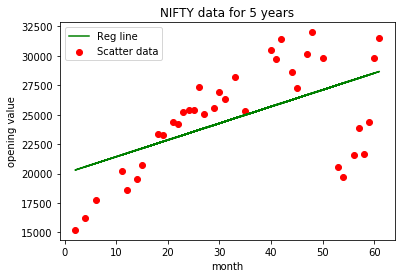

In [147]:
plt.scatter(X_train,Y_train,color='red',label="Scatter data")
plt.plot(X_train,reg.predict(X_train),c='green',label="Reg line")
#Giving title to the plot for making it look better, also giving labels to X and Y axis
plt.title('NIFTY data for 5 years')
plt.xlabel('month')
plt.ylabel('opening value')
plt.legend()
plt.show()   

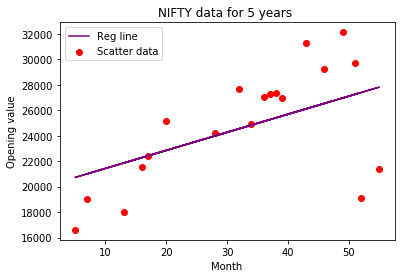

In [148]:
plt.scatter(X_test,Y_test,color='red',label="Scatter data")
plt.plot(X_test,reg.predict(X_test),c='purple',label="Reg line")
#Giving title to the plot for making it look better, also giving labels to X and Y axis
plt.title('NIFTY data for 5 years ')
plt.xlabel('Month')
plt.ylabel('Opening value')
plt.legend()
plt.show()  


In [149]:
from sklearn import metrics

#1. Result for MAE (Mean Absolute Error) >> The formula is avg(|y-yhat|)
print(metrics.mean_absolute_error(Y_test,Y_predict))

#2. Result for MSE (Mean Squared Error) >> The formula is avg(|(y-yhat)**2|)
print(metrics.mean_squared_error(Y_test,Y_predict))

#3. Let's calculate the RMSE from scartch, RMSE is also a measure of the goodness of fit of a model.
#The RMSE of $4585.41 is not bad and the model is predicting salaries to a good extent
rss=((Y_test-Y_predict)**2).sum() #residual sum of squares or the SSE (Sum squared errors)..just like Variance
mse=np.mean((Y_test-Y_predict)**2) #mean square error just like the standdard deviation or sigma
print(f"Final rmse value is :{np.sqrt(mse)}")

#3.1 Another way for RMSE, check from above calculation, the values match
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

#4. Calculating the R square and printing it for the goodness of fit, it come out to be 93.8%
#The variation that can be explained by this model is 93.8%
#reg is the LinearRegression() object
r2_score=reg.score(X_train,Y_train)
print(r2_score) 

2838.0758034394803
12709880.94608766
Final rmse value is :3565.0919968617445
3565.0919968617445
0.31345671044399004
